In [26]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from bs4 import BeautifulSoup
import re
import glob
import os
import pandas as pd
import requests
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from urllib.parse import urlparse
import base64
from pathlib import Path
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
def selenium_clothes(image_path):
    driver = webdriver.Chrome('./driver/chromedriver') #또는 chromedriver.exe

    driver.get("http://www.google.com")

    # 로딩을 기다리기 위해 잠시 대기합니다.
    time.sleep(2) # 2초 대기

    # WebDriverWait와 expected_conditions을 사용하여 요소가 나타날 때까지 기다린 후 해당 요소를 찾아 클릭합니다.
    div_element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "div.nDcEnd"))
    )
    div_element.send_keys(Keys.ENTER)
    
    

    # `<input type='file'>` 요소를 찾아 파일 경로를 전송
    file_input = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "input[type='file']"))  # 실제 선택자로 변경하세요.
    )
    file_input.send_keys(image_path)

    time.sleep(2)

    html_source = driver.page_source

    driver.close()
    
    return html_source

def list_directories(path):
    # 주어진 경로에 있는 항목들을 나열
    items = os.listdir(path)
    
    # 나열된 항목들 중 디렉토리(폴더)인 것만 필터링
    directories = [item for item in items if os.path.isdir(os.path.join(path, item))]
    
    return directories

def list_crop_images(directorie):
    # 주어진 경로에 있는 항목들을 나열
    items = os.listdir(directorie)
    
    # 나열된 항목들 중 파일인 것만 필터링하고, 특정 확장자(jpg, png, jpeg)를 가진 파일만 선택
    image_files = [item for item in items if os.path.isfile(os.path.join(directorie, item)) and item.lower().endswith(('jpg', 'png', 'jpeg'))]
    
    return image_files

nltk.download('punkt')

def site_parser(html_sources):
    soup = BeautifulSoup(html_sources, 'html.parser')
    site_name = []
    site_title = []
    site_url = []
    site_image_url = []

    divs_with_UAiK1e = soup.find_all('div', class_='UAiK1e')
    span_with_fjbPGe = soup.find_all('span', class_='fjbPGe')
    divs_with_Vd9M6 = soup.find_all('div', class_="Vd9M6")
    divs_with_Me0cf = soup.find_all('div', class_="Me0cf")

    for div in divs_with_Me0cf:
        img_tags = div.find_all('img')  # 각 div 태그 내의 모든 img 태그를 찾음
        for img in img_tags:
            img_src = img['src']  # img 태그의 src 속성 값을 가져옴
            if not img_src.startswith('h'):  # src 속성 값이 'h'로 시작하지 않는 경우
                img_src = img.get('data-src', '')  # img 태그의 data-src 속성 값을 대신 사용하되, 없으면 빈 문자열 사용
            site_image_url.append(img_src) 

    for div in divs_with_Vd9M6:
        site_url.append(div['data-action-url'])

    for div in divs_with_UAiK1e:
        site_title.append(div.get_text())

    for span in span_with_fjbPGe:
        site_name.append(span.get_text())

    data = {
        '사이트 이름': site_name,
        '사이트 제목': site_title,
        '사이트 주소': site_url,
        '이미지 주소': site_image_url
    }
    df = pd.DataFrame(data)
    
    return df

def image_print(image_path):
    img = mpimg.imread(image_path)

    # 이미지를 표시합니다.
    plt.imshow(img)
    plt.axis('off') # 이미지 주변의 축을 제거합니다.
    plt.show()

[nltk_data] Downloading package punkt to /Users/ihoyeol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
image_path_list = []
html_sources = []
relative_path = "crop_images/"

# 절대 경로로 변환 (현재 작업 디렉토리 기준)
path = os.path.join(os.getcwd(), relative_path)
directories = list_directories(path)

for i in directories:
    image_path = list_crop_images(path + i + "/")
    for j in image_path:
        image_path_list.append(path + i + "/" + j)

for u in image_path_list:    
    html_sources.append(selenium_clothes(u))

/var/folders/14/fstt0hn95t16v5n40z90k__w0000gn/T/ipykernel_15348/1832094148.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedriver') #또는 chromedriver.exe


In [56]:
df_list = []  # 데이터프레임을 저장할 빈 리스트 생성

for source in html_sources:
    df = site_parser(source)  # site_parser 함수를 사용하여 데이터프레임 생성
    df_list.append(df)  # 생성된 데이터프레임을 리스트에 추가

# 생성된 데이터프레임 리스트를 확인하는 출력문
print(f"df0부터 df{len(html_sources) - 1}까지 총 {len(df_list)}개의 데이터프레임을 리스트에 저장하였습니다.")

df0부터 df6까지 총 7개의 데이터프레임을 리스트에 저장하였습니다.


In [85]:
df_list[6]

,사이트 이름,사이트 제목,사이트 주소,이미지 주소
0,ryanfb.xyz,Untitled,https://ryanfb.xyz/loebolus-data/L042.pdf,https://encrypted-tbn0.gstatic.com/images?q=tb...
1,YouTube,oii itna sound - YouTube,https://www.youtube.com/watch?v=s0Y8NIS6xVw,https://encrypted-tbn0.gstatic.com/images?q=tb...
2,Freepik,무료로 다운로드 가능한 신문지 배경 벡터 & 일러스트 | Freepik,https://kr.freepik.com/vectors/%EC%8B%A0%EB%AC...,https://encrypted-tbn0.gstatic.com/images?q=tb...
3,YouTube,은행원의 🪙동전 세기🪙빠르게 세는 방법은?😉🎥영상에서 확인해주세요🤳#리브Next #...,https://www.youtube.com/watch?v=btKvarGSWd4,https://encrypted-tbn2.gstatic.com/images?q=tb...
4,한국문화재재단,경복궁 - 축전장소 - 궁중문화축전,https://www.chf.or.kr/cms/content/view/1281,https://encrypted-tbn3.gstatic.com/images?q=tb...
5,오르비,(후니) masterpiece 영어 풀 모의고사 후기에요. - 오르비,https://spica.orbi.kr/00019025231/%28%ED%9B%84...,https://encrypted-tbn2.gstatic.com/images?q=tb...
6,아카라이브,릾붕이 좀 슬프고 서운하다.. - 리버스 1999 채널,https://arca.live/b/arcalivebreverse/100628618...,https://encrypted-tbn2.gstatic.com/images?q=tb...
7,YouTube,화랑씨 리퀘(화랑님 죄송 해요....)너무 못그려서... - YouTube,https://www.youtube.com/watch?v=goiRv4gY8Do,https://encrypted-tbn0.gstatic.com/images?q=tb...
8,안산시청,Untitled,https://www.ansan.go.kr/common/file/directFile...,https://encrypted-tbn1.gstatic.com/images?q=tb...
9,acrc.go.kr,지방의회의원 행동강령 업무편람,https://www.acrc.go.kr/boardDownload.es?bid=11...,https://encrypted-tbn1.gstatic.com/images?q=tb...


<h2>비슷한 제품 찾기</h2>

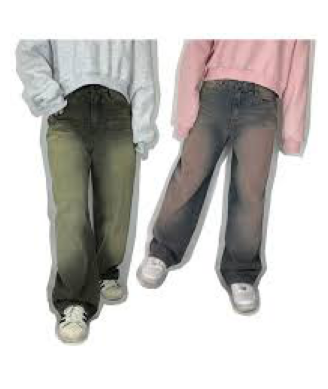

브랜드 이름 : 에이블리,
 제품 사이트 주소 : https://a-bly.com/app/goods/4671976



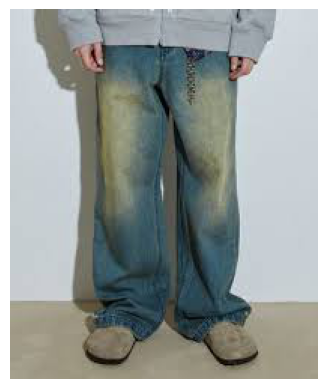

브랜드 이름 : 무신사,
 제품 사이트 주소 : https://www.musinsa.com/brands/idontwannasell?category1DepthCode=003&category2DepthCodes=003007&category3DepthCodes=



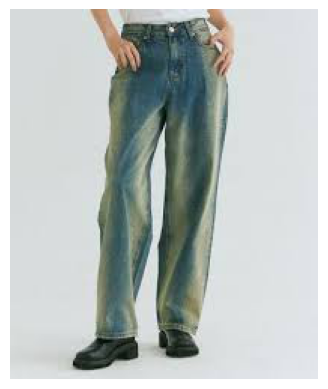

브랜드 이름 : 무신사,
 제품 사이트 주소 : https://display.musinsa.com/display/brands/fieldworker?category1DepthCode=003&category2DepthCodes=003002&category3DepthCodes=003002



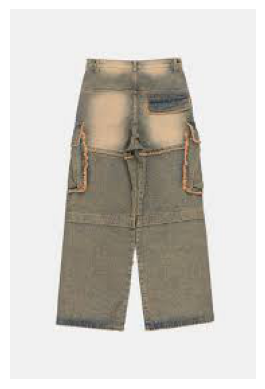

브랜드 이름 : 지그재그,
 제품 사이트 주소 : https://zigzag.kr/catalog/products/130769110



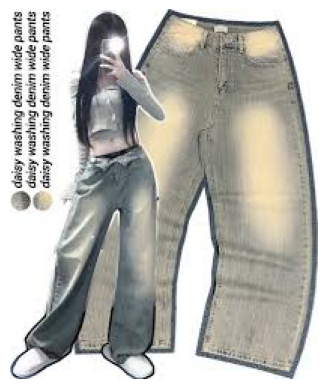

브랜드 이름 : 에이블리,
 제품 사이트 주소 : https://a-bly.com/app/goods/6914432



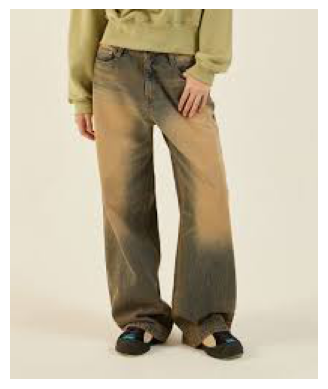

브랜드 이름 : 무신사,
 제품 사이트 주소 : https://www.musinsa.com/app/goods/3511456

--------------------------------------------------------------------------------------------------


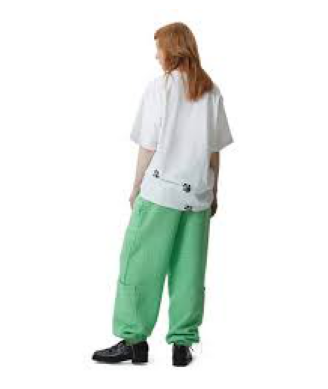

브랜드 이름 : 무신사,
 제품 사이트 주소 : https://www.musinsa.com/app/goods/3401835

--------------------------------------------------------------------------------------------------


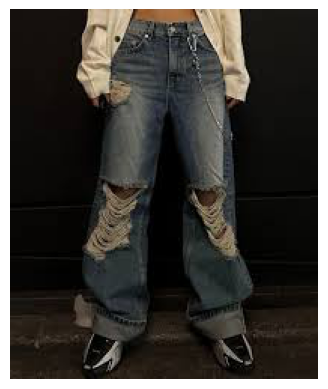

브랜드 이름 : 지그재그,
 제품 사이트 주소 : https://zigzag.kr/catalog/products/121029378



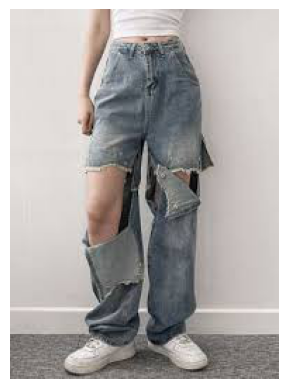

브랜드 이름 : 지그재그,
 제품 사이트 주소 : https://zigzag.kr/app/catalog/products/128397702

--------------------------------------------------------------------------------------------------


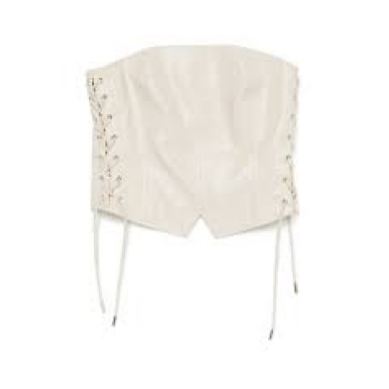

브랜드 이름 : 무신사,
 제품 사이트 주소 : https://global.musinsa.com/us/goods/3057147



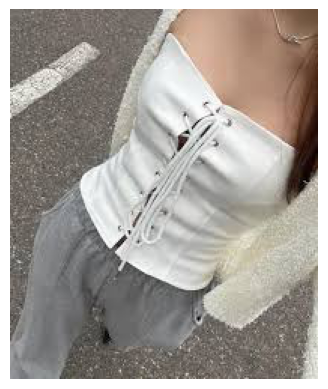

브랜드 이름 : 에이블리,
 제품 사이트 주소 : https://a-bly.com/app/goods/5640021



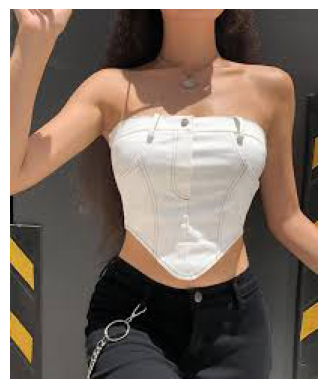

브랜드 이름 : 지그재그,
 제품 사이트 주소 : https://zigzag.kr/catalog/products/124642979



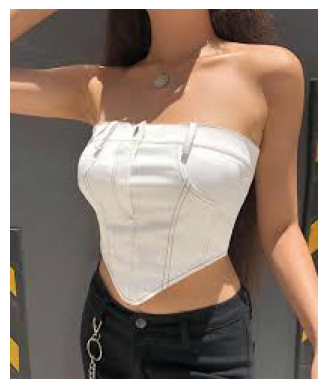

브랜드 이름 : 지그재그,
 제품 사이트 주소 : https://zigzag.kr/catalog/products/123450155



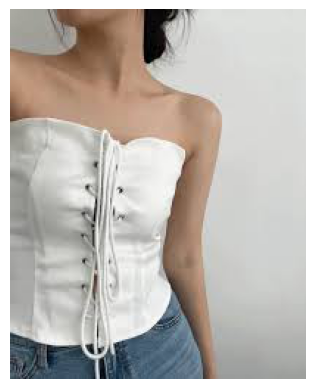

브랜드 이름 : 지그재그,
 제품 사이트 주소 : https://zigzag.kr/app/catalog/products/122706571

--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------


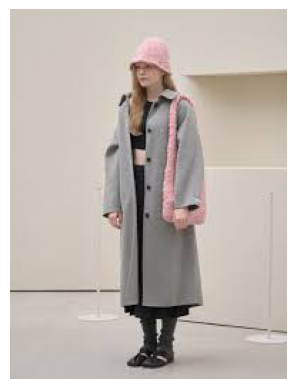

브랜드 이름 : 무신사,
 제품 사이트 주소 : https://www.musinsa.com/app/goods/3779599



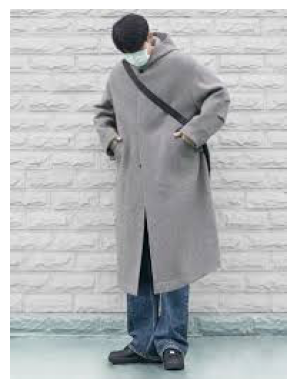

브랜드 이름 : 무신사,
 제품 사이트 주소 : https://www.musinsa.com/snap/235780



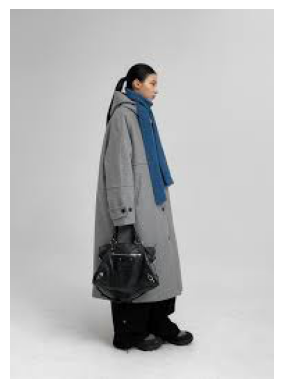

브랜드 이름 : 지그재그,
 제품 사이트 주소 : https://zigzag.kr/catalog/products/130732347



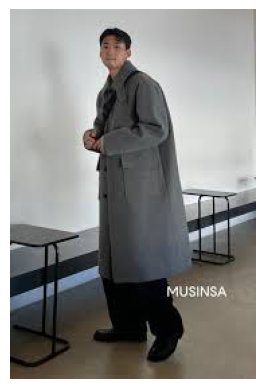

브랜드 이름 : 무신사,
 제품 사이트 주소 : https://www.musinsa.com/search/musinsa/integration?q=%EB%82%A8%EC%9E%90%EB%B0%9C%EB%A7%88%EC%B9%B8%EC%BD%94%ED%8A%B8+%ED%82%A4%EB%AE%A4%EC%96%B4



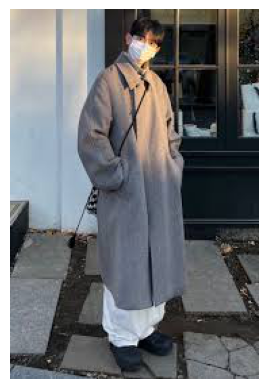

브랜드 이름 : 무신사,
 제품 사이트 주소 : https://www.musinsa.com/snap/219216

--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------


In [90]:
for i in df_list:   
    top3_shopping = ['에이블리', '지그재그', '브랜디', '무신사', '쿠팡']

    filtered_df = i[i['사이트 이름'].isin(top3_shopping)]
    
    for m in range(len(filtered_df)):
        url = filtered_df.iloc[m]['이미지 주소']
        image_path = "./downloaded_images/" + str(m) + "_image.jpg"

        # curl 요청
        os.system(f"curl -s {url} > {image_path} 2>/dev/null")
        
        image_print(image_path)
        
        # 이미지와 관련된 정보 출력
        print(f"브랜드 이름 : {filtered_df.iloc[m]['사이트 이름']},\n 제품 사이트 주소 : {filtered_df.iloc[m]['사이트 주소']}\n")
            
        # .jpg 파일 패턴 설정
        file_pattern = './downloaded_images/*.jpg'

        # 지정된 패턴과 일치하는 모든 파일 찾기
        files = glob.glob(file_pattern)

        # 찾은 파일 삭제
        for file in files:
            os.remove(file)
    print("--------------------------------------------------------------------------------------------------")

<h2>정품 찾기 코드(작성 중)</h2>

In [15]:
def clean_text(text):
    # 영어, 한국어, 공백을 제외하고 모두 제거
    cleaned_text = re.sub(r'[^a-zA-Z가-힣\s]', '', text)
    return cleaned_text

# 텍스트 클리닝 적용
df0['클린 사이트 제목'] = df0['사이트 제목'].apply(clean_text)

# 클리닝된 텍스트를 토큰화
df0['토큰화 사이트 제목'] = df0['클린 사이트 제목'].apply(word_tokenize)

df0

,사이트 이름,사이트 제목,사이트 주소,이미지 주소,클린 사이트 제목,토큰화 사이트 제목
0,왈라랜드,CONTENT - 르세라핌 홍은채 앨범 EASY 미디어 쇼케이스 나시탑· 그래픽 팬...,https://wala-land.com/content/3634,https://encrypted-tbn1.gstatic.com/images?q=tb...,CONTENT 르세라핌 홍은채 앨범 EASY 미디어 쇼케이스 나시탑 그래픽 팬츠 ...,"[CONTENT, 르세라핌, 홍은채, 앨범, EASY, 미디어, 쇼케이스, 나시탑,..."
1,이데일리,"[포토]르세라핌 홍은채, 완벽한 워킹",https://m.edaily.co.kr/news/read?newsId=013579...,https://encrypted-tbn0.gstatic.com/images?q=tb...,포토르세라핌 홍은채 완벽한 워킹,"[포토르세라핌, 홍은채, 완벽한, 워킹]"
2,NATE,"[포토S] 르세라핌 홍은채, '퍼플 염색 머리 찰떡' : 네이트 연예",https://news.nate.com/view/20240219n30533,https://encrypted-tbn0.gstatic.com/images?q=tb...,포토S 르세라핌 홍은채 퍼플 염색 머리 찰떡 네이트 연예,"[포토S, 르세라핌, 홍은채, 퍼플, 염색, 머리, 찰떡, 네이트, 연예]"
3,Instagram,"lesserafim.diario on Instagram: ""📸 @le_sserafi...",https://www.instagram.com/lesserafim.diario/p/...,https://encrypted-tbn2.gstatic.com/images?q=tb...,lesserafimdiario on Instagram lesserafim EASY...,"[lesserafimdiario, on, Instagram, lesserafim, ..."
4,Instagram,* 1017 ALYX 9SM TRICON PUFFER - X color. Black...,https://www.instagram.com/082plus/p/C0do39XL-JD/,https://encrypted-tbn3.gstatic.com/images?q=tb...,ALYX SM TRICON PUFFER X color Black NISHIMO...,"[ALYX, SM, TRICON, PUFFER, X, color, Black, NI..."
5,微博,#洪恩採[超话]#舞台同款 240219 EASY sho... 来自IdolWardrob...,https://weibo.com/6549746939/O1jxEgPhs,https://encrypted-tbn0.gstatic.com/images?q=tb...,EASY sho IdolWardrobe,"[EASY, sho, IdolWardrobe]"
6,뉴데일리,Save Internet 뉴데일리,https://www.newdaily.co.kr/svc/article_print.h...,https://encrypted-tbn0.gstatic.com/images?q=tb...,Save Internet 뉴데일리,"[Save, Internet, 뉴데일리]"
7,kuas.kr,[L사이즈 블루] [당일발송] 헤비 디스트럭션 데님 진,https://www.kuas.kr/shop_view/?idx=3709,https://encrypted-tbn3.gstatic.com/images?q=tb...,L사이즈 블루 당일발송 헤비 디스트럭션 데님 진,"[L사이즈, 블루, 당일발송, 헤비, 디스트럭션, 데님, 진]"
8,위시버킷,런웨이티켓 Doodle Wide Cotton Pocket Pants - 위시버킷,https://www.wishbucket.io/items/1829767,https://encrypted-tbn2.gstatic.com/images?q=tb...,런웨이티켓 Doodle Wide Cotton Pocket Pants 위시버킷,"[런웨이티켓, Doodle, Wide, Cotton, Pocket, Pants, 위..."
9,reket.co.kr,[RUNWAY TICKET] Doodle Wide Cotton Pocket Pant...,https://shop.reket.co.kr/product/SQT3Q7XKDS7D,https://encrypted-tbn0.gstatic.com/images?q=tb...,RUNWAY TICKET Doodle Wide Cotton Pocket Pants ...,"[RUNWAY, TICKET, Doodle, Wide, Cotton, Pocket,..."


In [16]:
# 모든 토큰을 하나의 리스트로 합치기
all_tokens = sum(df0['토큰화 사이트 제목'], [])

# 토큰의 빈도 계산
token_counts = Counter(all_tokens)

# 가장 빈도가 높은 상위 10개 토큰 출력
top_10_tokens = token_counts.most_common(10)

print(top_10_tokens)

[('Instagram', 10), ('데님', 10), ('Pants', 9), ('르세라핌', 8), ('홍은채', 6), ('팬츠', 6), ('color', 6), ('Graffiti', 6), ('청바지', 6), ('진', 5)]


In [18]:
for i in range(len(df0)):
    url = df0['이미지 주소'][i]

    # time check
    start = time.time()

    # curl 요청
    os.system("curl " + url + " > ./downloaded_images/" + str(i) + "_image.jpg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8022  100  8022    0     0  23141      0 --:--:-- --:--:-- --:--:-- 23118
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6542  100  6542    0     0  24063      0 --:--:-- --:--:-- --:--:-- 24140
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6403  100  6403    0     0  14201      0 --:--:-- --:--:-- --:--:-- 14228
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9339  100  9339    0     0  47125      0 --:--:-- --:--:-- --:--:-- 46929
  % Total    % Received % Xferd  Average Speed   Tim

100  4627  100  4627    0     0  15308      0 --:--:-- --:--:-- --:--:-- 15321
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3828  100  3828    0     0  18850      0 --:--:-- --:--:-- --:--:-- 18857
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4341  100  4341    0     0   8930      0 --:--:-- --:--:-- --:--:--  8950
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4266  100  4266    0     0  10814      0 --:--:-- --:--:-- --:--:-- 10800
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8328  100  8328    0     0   8255      0  0:00:

In [11]:
black_list = ['에이블리', '지그재그', '브랜디', '쿠팡', "11번가", "NAVER", "DHgate", "네이트", "X", "카페24", "Yahoo! JAPAN", "무신사", "조선일보", "블링샵"]

white_list_df = df[~df['사이트 이름'].isin(black_list)]

# 필터링된 데이터프레임을 출력합니다.
white_list_df

,사이트 이름,사이트 제목,사이트 주소,이미지 주소,클린 사이트 제목,토큰화 사이트 제목
0,홀페이퍼,투라인 트위드 크롭 자켓 - 블랙 [3차 오더 2/6 순차 출고] : WHOLE P...,https://wholepaper.com/34/?idx=149,https://encrypted-tbn2.gstatic.com/images?q=tb...,투라인 트위드 크롭 자켓 블랙 차 오더 순차 출고 WHOLE PAPER 홀페이퍼,"[투라인, 트위드, 크롭, 자켓, 블랙, 차, 오더, 순차, 출고, WHOLE, P..."
4,SellerWork,MIDNIGHT MOVE – SellerWork,https://seller.work/collections/midnight-move,https://encrypted-tbn3.gstatic.com/images?q=tb...,MIDNIGHT MOVE SellerWork,"[MIDNIGHT, MOVE, SellerWork]"
5,후루츠패밀리,제니아디다스 크롭트랙탑,https://fruitsfamily.com/product/qhn/%EC%A0%9C...,https://encrypted-tbn3.gstatic.com/images?q=tb...,제니아디다스 크롭트랙탑,"[제니아디다스, 크롭트랙탑]"
6,The Outnet,CHLOÉ Whipstitched wool and linen-blend jacket...,https://www.theoutnet.com/ko-kr/shop/product/c...,https://encrypted-tbn3.gstatic.com/images?q=tb...,CHLO Whipstitched wool and linenblend jacket ...,"[CHLO, Whipstitched, wool, and, linenblend, ja..."
8,씨앤힙,듀아 골지 쫀쫀 반바지 핫팬츠 하이웨스트 숏팬츠 (메란지/블랙),https://cnhip.kr/product/%EB%93%80%EC%95%84-%E...,https://encrypted-tbn3.gstatic.com/images?q=tb...,듀아 골지 쫀쫀 반바지 핫팬츠 하이웨스트 숏팬츠 메란지블랙,"[듀아, 골지, 쫀쫀, 반바지, 핫팬츠, 하이웨스트, 숏팬츠, 메란지블랙]"
9,이랜드몰,아디다스 올웨이즈 오리지널 SST 트랙 재킷 (IC5578),http://www.elandmall.co.kr/i/item?itemNo=23040...,https://encrypted-tbn3.gstatic.com/images?q=tb...,아디다스 올웨이즈 오리지널 SST 트랙 재킷 IC,"[아디다스, 올웨이즈, 오리지널, SST, 트랙, 재킷, IC]"
10,re-i.kr,아치브 볼레로 자켓 2color,https://re-i.kr/product/%EC%95%84%EC%B9%98%EB%...,https://encrypted-tbn1.gstatic.com/images?q=tb...,아치브 볼레로 자켓 color,"[아치브, 볼레로, 자켓, color]"
12,reflow.cx,(최저가)7517소매지퍼투웨이긴팔가디건,https://page.reflow.cx/levain/agents/1045,https://encrypted-tbn2.gstatic.com/images?q=tb...,최저가소매지퍼투웨이긴팔가디건,[최저가소매지퍼투웨이긴팔가디건]
13,W컨셉,[도프셉]울 로고 바시티자켓,https://m.wconcept.co.kr/Product/302262067?ent...,https://encrypted-tbn1.gstatic.com/images?q=tb...,도프셉울 로고 바시티자켓,"[도프셉울, 로고, 바시티자켓]"
14,MARQURIE VINTAGE,HEAD 헤드 블랙 화이트 파이프라인 올드스쿨 집업 져지 SIZE M - 말퀴리 빈...,https://marqurie.co.kr/product/head-%ED%97%A4%...,https://encrypted-tbn0.gstatic.com/images?q=tb...,HEAD 헤드 블랙 화이트 파이프라인 올드스쿨 집업 져지 SIZE M 말퀴리 빈티...,"[HEAD, 헤드, 블랙, 화이트, 파이프라인, 올드스쿨, 집업, 져지, SIZE,..."


<h2>downloaded_image 폴더 비우기 코드</h2>

In [26]:
# .jpg 파일 패턴 설정
file_pattern = './downloaded_images/*.jpg'

# 지정된 패턴과 일치하는 모든 파일 찾기
files = glob.glob(file_pattern)

# 찾은 파일 삭제 반복
for file in files:
    os.remove(file)  # 파일 삭제
    print(f'{file} 파일이 삭제되었습니다.')

./downloaded_images/41_image.jpg 파일이 삭제되었습니다.
./downloaded_images/55_image.jpg 파일이 삭제되었습니다.
./downloaded_images/5_image.jpg 파일이 삭제되었습니다.
./downloaded_images/17_image.jpg 파일이 삭제되었습니다.
./downloaded_images/36_image.jpg 파일이 삭제되었습니다.
./downloaded_images/58_image.jpg 파일이 삭제되었습니다.
./downloaded_images/22_image.jpg 파일이 삭제되었습니다.
./downloaded_images/8_image.jpg 파일이 삭제되었습니다.
./downloaded_images/47_image.jpg 파일이 삭제되었습니다.
./downloaded_images/3_image.jpg 파일이 삭제되었습니다.
./downloaded_images/29_image.jpg 파일이 삭제되었습니다.
./downloaded_images/53_image.jpg 파일이 삭제되었습니다.
./downloaded_images/30_image.jpg 파일이 삭제되었습니다.
./downloaded_images/24_image.jpg 파일이 삭제되었습니다.
./downloaded_images/11_image.jpg 파일이 삭제되었습니다.
./downloaded_images/54_image.jpg 파일이 삭제되었습니다.
./downloaded_images/4_image.jpg 파일이 삭제되었습니다.
./downloaded_images/40_image.jpg 파일이 삭제되었습니다.
./downloaded_images/16_image.jpg 파일이 삭제되었습니다.
./downloaded_images/59_image.jpg 파일이 삭제되었습니다.
./downloaded_images/23_image.jpg 파일이 삭제되었습니다.
./downloaded_images/9_image.jpg 파일이 삭제